In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.29018352, -0.43017846, -0.34782996, ..., -1.01048954,
        -0.21804395, -0.67143949],
       [-0.10802853,  0.07868936, -0.1627051 , ..., -0.86938415,
        -0.62667966, -0.83531923],
       [-1.58012107, -0.15581194, -1.5700609 , ..., -1.77276536,
         0.38525682, -0.1472527 ],
       ...,
       [-1.25924805, -0.84290075, -1.26857184, ..., -0.98150158,
        -0.09899259, -0.11356314],
       [ 0.17781468,  0.22173515,  0.14000456, ..., -0.21293736,
        -0.85834716, -1.01347422],
       [ 1.14183492,  0.30850063,  1.14415435, ...,  0.54320345,
         0.27585828, -0.29171812]])

In [ ]:
y_train

,diagnosis
246,B
438,B
314,B
188,B
66,B
...,...
91,M
64,M
273,B
495,B


### Label Encoding

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,

### Numpy arrays to PyTorch tensors

In [ ]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

### Important Parameters

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
learning_rate = 0.1
epochs = 25

In [ ]:
# define loss function
loss_function = nn.BCELoss()

In [ ]:
y_train_tensor.shape

torch.Size([455])

### Training Pipeline

In [ ]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # clear gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.8195769786834717
Epoch: 2, Loss: 0.5947414636611938
Epoch: 3, Loss: 0.48203620314598083
Epoch: 4, Loss: 0.4148964285850525
Epoch: 5, Loss: 0.36984068155288696
Epoch: 6, Loss: 0.33721426129341125
Epoch: 7, Loss: 0.31231069564819336
Epoch: 8, Loss: 0.29255491495132446
Epoch: 9, Loss: 0.27641627192497253
Epoch: 10, Loss: 0.2629256248474121
Epoch: 11, Loss: 0.2514381408691406
Epoch: 12, Loss: 0.24150732159614563
Epoch: 13, Loss: 0.23281335830688477
Epoch: 14, Loss: 0.22512081265449524
Epoch: 15, Loss: 0.21825219690799713
Epoch: 16, Loss: 0.2120709866285324
Epoch: 17, Loss: 0.20647016167640686
Epoch: 18, Loss: 0.2013646513223648
Epoch: 19, Loss: 0.19668583571910858
Epoch: 20, Loss: 0.19237764179706573
Epoch: 21, Loss: 0.18839381635189056
Epoch: 22, Loss: 0.1846957504749298
Epoch: 23, Loss: 0.18125107884407043
Epoch: 24, Loss: 0.17803221940994263
Epoch: 25, Loss: 0.17501576244831085


### Evaluation

In [ ]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.5526315569877625


### Defining the model

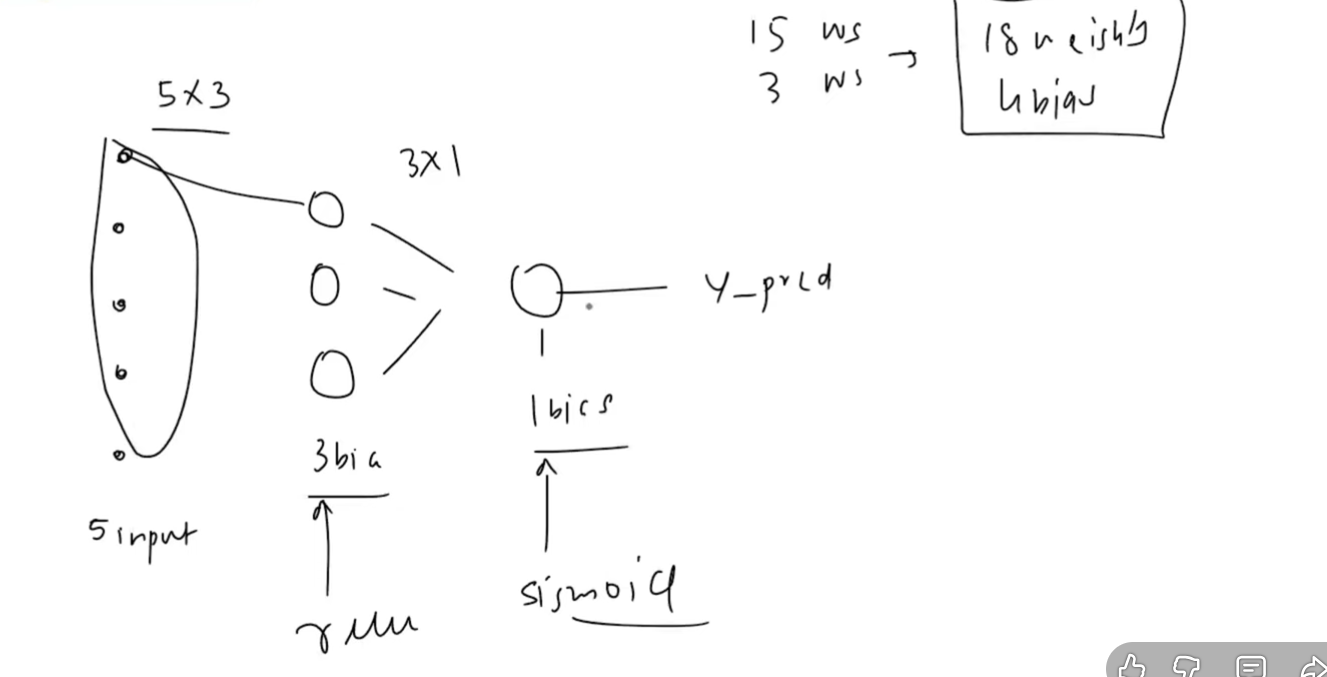

In [4]:
import torch
class Model(torch.nn.Module):
  def __init__(self, num_features):
    super(Model, self).__init__()
    """
    nn : 2 layer (1 hidenn + 1 output layer) that requires a sequential pass
    """
    self.network = torch.nn.Sequential(  # sequential container
        torch.nn.Linear(num_features, 3),
        torch.nn.ReLU(),
        torch.nn.Linear(3, 1),
        torch.nn.Sigmoid()
    )
  def forward(self,x):
    return self.network(x)

In [5]:
features = torch.rand(10,5)
model = Model(features.shape[1])
model(features) # forward pass

tensor([[0.4496],
        [0.3897],
        [0.3814],
        [0.3027],
        [0.3292],
        [0.3657],
        [0.3226],
        [0.3795],
        [0.3375],
        [0.3053]], grad_fn=<SigmoidBackward0>)